# Deaths during the L.A. Riots of 1992

More than 60 people lost their lives amid the violence that ravaged the city during the L.A. Riots that began on April 29, 1992. According to the Los Angeles Times, the city had a record 1,096 homicides by the end of the year. 1992 remains L.A.'s deadliest year. This dataset contains information on the 63 deaths that occurred in relation to the riots.

### Importing Tools & Data

In [10]:
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt

In [11]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [14]:
import folium

In [15]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [16]:
death = pd.read_csv("../lede-data/la-riots-deaths.csv")

In [51]:
df2 = death.dropna()

### Explore the Dataset

In [17]:
death.head()

,first,last,Full Name,Solved*,Age,Gender,Race,Date,Address,Neighborhood,status,lat,lon,Map Description,Story,URL
0,Cesar A.,Aguilar,Cesar A. Aguilar,NaN,18,Male,Latino,1992-04-30,2009 W. 6th St.,Westlake,Officer involved shooting,-118.273976,34.059281,"Cesar Aguilar, an 18-year-old Latino, was shot...","Cesar Aguilar, an 18-year-old Latino, was shot...",http://articles.latimes.com/print/1992-06-21/n...
1,George,Alvarez,George Alvarez,NaN,42,Male,Latino,1992-05-01,Main & College streets,Chinatown,Not riot-related,-118.234098,34.062690,"George Alvarez, a 42-year-old Latino, died Fri...","George Alvarez, a 42-year-old Latino, died Fri...",NaN
2,Wilson,Alvarez,Wilson Alvarez,Unsolved,40,Male,Latino,1992-05-23,3100 Rosecrans Ave.,Hawthorne,Homicide,-118.326816,33.901662,"Wilson Alvarez, a 40-year-old Latino, died of ...","Wilson Alvarez, a 40-year-old Latino, died of ...",NaN
3,Brian E.,Andrew,Brian E. Andrew,NaN,30,Male,Black,1992-04-30,Rosecrans & Chester avenues,Compton,Officer involved shooting,-118.215390,33.903457,"Brian E. Andrew, a 30-year-old black man, was ...","Brian E. Andrew, a 30-year-old black man, was ...",http://articles.latimes.com/print/1992-05-24/n...
4,Vivian,Austin,Vivian Austin,NaN,87,Female,Black,5/3/1992,1600 W. 60th St.,Harvard Park,Death,-118.304741,33.985667,"Vivian Austin, an 87-year-old black woman, die...","Vivian Austin, an 87-year-old black woman, die...",NaN


The dataset includes a story of how the victim died at the far right. 

#### How many victims?

In [18]:
len(death)

63

#### Solved vs. unsolved

In [47]:
death.value_counts("Solved*")

Solved*
Unsolved    23
Solved      13
Name: count, dtype: int64

#### Deaths by race

In [19]:
death.value_counts("Race")

Race
 Black     19
 Latino    17
 White     13
Black       9
 Asian      2
Latino      2
White       1
Name: count, dtype: int64

<Axes: xlabel='Race'>

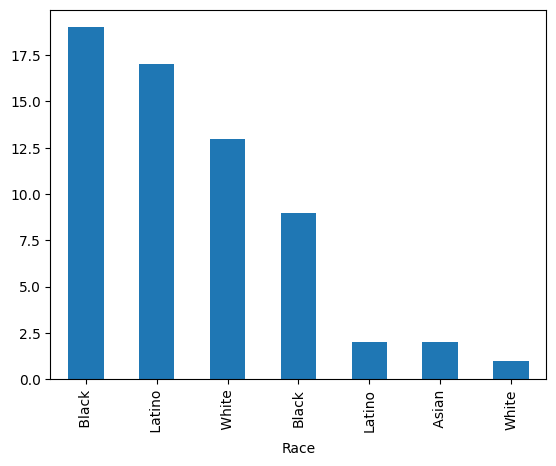

In [20]:
death["Race"].value_counts().plot(kind="bar")

#### Deaths by status

In [21]:
death.value_counts("status")

status
Homicide                     36
Officer involved shooting    10
Not riot-related              9
Death                         8
Name: count, dtype: int64

<Axes: xlabel='status'>

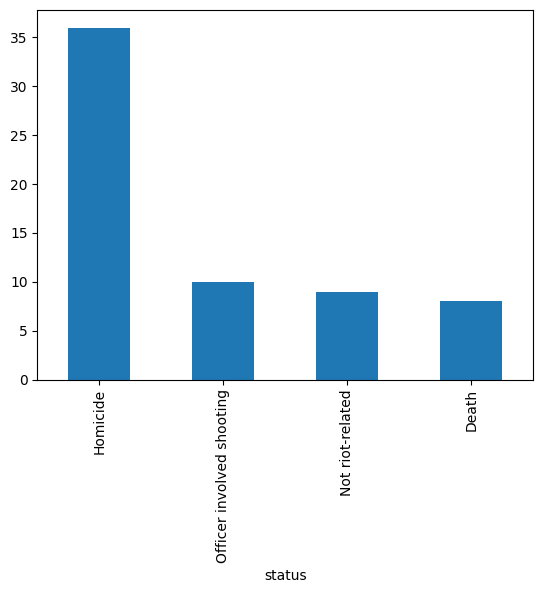

In [24]:
death["status"].value_counts().plot(kind="bar")

Some deaths in the "death" category are unrelated to the riots, or their relations to the riots are unknown. For example, Carol Benson, a 42-year-old Black woman, was struck on the 110 Freeway near Slauson Avenue in a hit-and-run accident on Saturday, May 2, 1992. According to the dataset, authorities say she lived by herself in an apartment across from a small church in South Los Angeles. No one claimed her body. 

#### Map

I switched the longitude and latitude because they're incorrectly labeled in the dataset.

In [59]:
longitude = death['lat'].values
latitude = death['lon'].values

In [60]:
map = folium.Map(location=[34.0593, -118.274], zoom_start = 10)

In [61]:
for i in range(63):
    if (i != 51):
        folium.Marker([latitude[i],longitude[i]],popup = death.loc[i,'Full Name'] ).add_to(map)
map

Most deaths occurred in Los Angeles, but there were some that happened up in the San Fernando Valley and the Inland Empire. In Pomona, which is the outlier in this dataset, Meeker Gibson, a 35-year-old Black man, was shot and killed Friday, May 1, 1992, in an apparent drive-by shooting at a telephone stand at a gas station at Holt and Loranne avenues. 